In [1]:
import pandas as pd
from datetime import datetime 
import time
import numpy as np
from pandas import set_option
from numpy import set_printoptions 
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sym = "TSLA"  
token = "pk_6b3ac6169ef64261bca98b281e6e5e93"
df_temp = pd.read_json('https://cloud.iexapis.com/stable/stock/'+sym+'/chart/1d?token='+token+'')

In [3]:
df=df_temp.drop(['close', 'high', 'low', 'volume', 'label', 'average', 'notional', 'numberOfTrades' ], axis=1)

In [4]:
df['minute']= pd.to_datetime(df['minute'])

In [5]:
df['datetime']=df.apply(lambda x:'%s %s' % (x['date'],x['minute']),axis=1)
df.drop(['date', 'datetime'], axis=1, inplace=True)

In [6]:
df.rename(columns={'minute': 'datetime'}, inplace=True)

In [7]:
df['ts'] = df.datetime.values.astype(np.int64) // 10 ** 9

In [8]:
df

,datetime,open,ts
0,2021-01-28 09:30:00,819.665,1611826200
1,2021-01-28 09:31:00,813.750,1611826260
2,2021-01-28 09:32:00,816.305,1611826320
3,2021-01-28 09:33:00,815.950,1611826380
4,2021-01-28 09:34:00,820.000,1611826440
...,...,...,...
233,2021-01-28 13:23:00,839.455,1611840180
234,2021-01-28 13:24:00,839.340,1611840240
235,2021-01-28 13:25:00,839.390,1611840300
236,2021-01-28 13:26:00,838.890,1611840360


In [9]:
df= df.drop(['datetime'], axis=1)
df

,open,ts
0,819.665,1611826200
1,813.750,1611826260
2,816.305,1611826320
3,815.950,1611826380
4,820.000,1611826440
...,...,...
233,839.455,1611840180
234,839.340,1611840240
235,839.390,1611840300
236,838.890,1611840360


In [10]:
array=df.values
X=array[:,1]
Y=array[:,0]


In [11]:
rx=array[:, 1].reshape(-1,1)

#print(rx)

val_size = 0.30
seed = 3
x_train, x_val, y_train, y_val = train_test_split(rx, Y, test_size=val_size, random_state=seed)

In [12]:
num_folds=3
seed =1
scoring='r2'

In [13]:
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(
        model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.434121 (0.082919)
 LASSO : 0.434121 (0.082917)
 EN : 0.434121 (0.082918)
 KNN : 0.946420 (0.011987)
 CART : 0.942953 (0.021851)
 SVR : 0.709946 (0.051506)


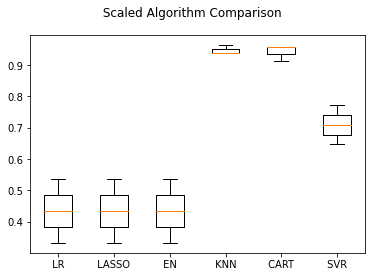

In [14]:
fig = pyplot.figure()
fig.suptitle(' Scaled Algorithm Comparison ')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [15]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(x_train, y_train)

predictions = model.predict(x_val)
print(r2_score(y_val, predictions))

0.942675691283629


In [16]:
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, y_train)

rescaledValidationX = scaler.transform(x_val)
predictions = model.predict(rescaledValidationX)
print(r2_score(y_val, predictions))

0.9674488301287171


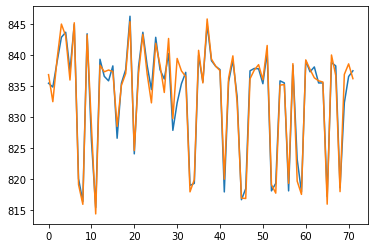

In [17]:
pyplot.plot(predictions)
pyplot.plot(y_val)

pyplot.rcParams['figure.figsize']=(50,25)
pyplot.show()

